In [1]:
import augs
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

with open('filenames.json') as rf:
    file_loc = json.load(rf)['file_loc']
augmentation = augs.Wiggle()

In [2]:
def plot_maps(param):
    fig, ax = plt.subplots(6, 10, figsize=[12, 7])
    fig.tight_layout()
    fig.suptitle('Intensity mappings, jitter parameter = %i' % param, y = 1.03)
    for nm, i in enumerate(np.ravel(ax)):
        i.axis('off')
        '''if nm >= 50:
            i.set_xlabel("input")
        if nm % 10 == 0:
            i.set_ylabel("output")'''
        mp = augmentation.wiggle_map(param)
        i.plot(np.arange(256), mp)

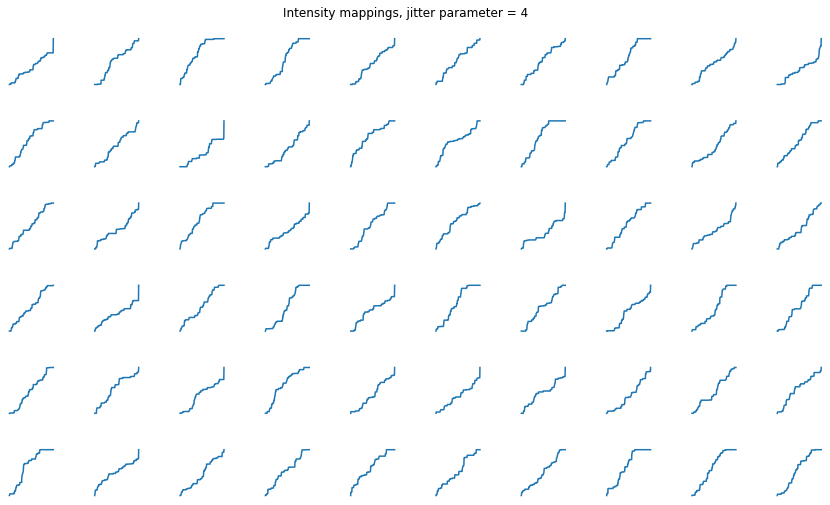

In [5]:
plot_maps(4)

In [7]:
def plot_images_kaist(param):
    # names = ['00001', '01002', '02003', '03004']
    names = ['set00_V001_lwir_I01687',
             'set00_V002_lwir_I00393',
             'set00_V003_lwir_I00709',
             'set00_V005_lwir_I01131']
    x, out1, out2, out3, diff1, diff2, diff3 = [], [], [], [], [], [], []
    for i, navn in enumerate(names):
        x.append(cv2.imread(file_loc % navn))
        out1.append(augmentation(x[i], param))
        out2.append(augmentation(x[i], param))
        out3.append(augmentation(x[i], param))
    
    figs, axs = plt.subplots(4, 4, figsize=[18, 14])
    figs.tight_layout()
    [a.axis('off') for a in np.ravel(axs)]
    # figs.tight_layout()
    figs.suptitle('Mono-Augmentation, jitter parameter = %i' % param, size='xx-large', y=1.03)
    for i, navn in enumerate(names):
        axs[i, 0].set_title('KAIST_' + navn + ' original')
        axs[i, 0].imshow(x[i])
        diff1.append(np.amax(np.abs(x[i] - out1[i])))
        axs[i, 1].set_title('Adjusted, max(new - original) = %i' % diff1[i])
        axs[i, 1].imshow(out1[i])
        diff2.append(np.amax(np.abs(x[i] - out2[i])))
        axs[i, 2].set_title('Adjusted, max(new - original) = %i' % diff2[i])
        axs[i, 2].imshow(out2[i])
        diff3.append(np.amax(np.abs(x[i] - out3[i])))
        axs[i, 3].set_title('Adjusted, max(new - original) = %i' % diff3[i])
        axs[i, 3].imshow(out3[i])

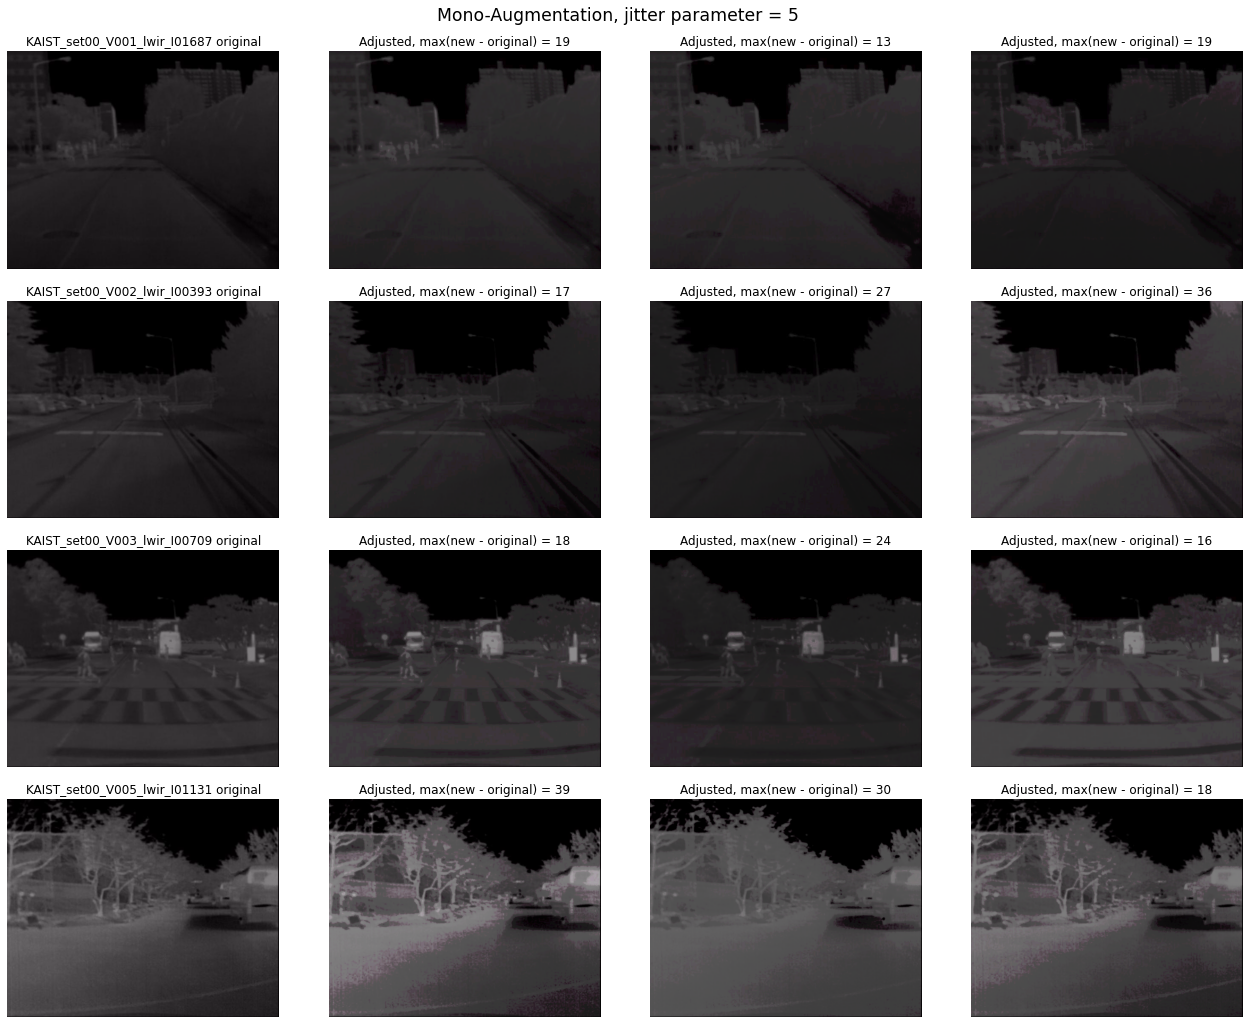

In [8]:
plot_images_kaist(40)